## Пункт 1. EDA

**Импорт необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pd.set_option('display.max_columns', 100)
sns.set_theme(font_scale=1.1)

**Загрузка данных и базовый анализ структуры**

In [2]:
df = pd.read_excel('data/course_data.xlsx')
display(df.head())
print("Размер таблицы:", df.shape)
print("\nТипы данных:\n", df.dtypes.value_counts())
print("\nПропуски:\n", df.isnull().sum()[df.isnull().sum() > 0])

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,...,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,19.794682,13.127794,12.595754,12.595754,12.648545,12.648545,11.473090,11.473090,8.180905,8.180905,-0.08,2.187750e+06,21.163454,7.257648,3.027177,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,446.808,388.344,446.458903,186,0,0.094802,-0.325573,0.325573,0.094802,0.562500,0.906250,1.156250,15.353938,9.681293,2.665274,-2.477203,2.679014,-2.565224,5.117187,-0.922902,3.214947,1.219066,643.620154,23.794682,23.689110,23.689110,14.595754,14.249005,14.249005,15.671216,15.671216,13.402236,13.402236,10.140303,10.140303,-0.08,8.610751e+06,25.026112,7.709373,3.470070,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,398.679,352.311,398.366099,164,0,0.038844,-0.293526,0.293526,0.038844,0.620690,1.000000,1.310345,14.821216,9.700497,2.600529,-2.342885,2.644709,-2.322030,5.944502,0.193510,3.179270,1.120513,626.651366,20.916003,20.241516,20.241516,13.627794,12.704226,12.704226,12.411631,12.411631,10.945991,10.945991,7.517023,7.517023,-0.66,3.572142e+06,21.567454,7.485204,3.263848,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,466.713,424.377,466.334799,184,0,0.062897,-0.257239,0.257239,0.062897,0.600000,0.971429,1.257143,14.831112,9.700386,2.602486,-2.342009,2.648473,-2.318893,5.963448,0.193687,3.337074,1.136678,1101.164252,24.639617,22.617677,22.617677,16.526773,13.868825,13.868825,13.613700,13.613700,11.833480,11.833480,8.119076,8.119076,-2.22,1.053758e+08,23.194917,7.639211,3.345855,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Размер таблицы: (1001, 214)

Типы данных:
 int64      107
float64    107
Name: count, dtype: int64

Пропуски:
 MaxPartialCharge       3
MinPartialCharge       3
MaxAbsPartialCharge    3
MinAbsPartialCharge    3
BCUT2D_MWHI            3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPHI          3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
dtype: int64


- Количество признаков большое, лишний столбец unnamed можно удалить, пропусков немного, заменим их на медианные значения.

In [3]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

if df.isnull().sum().sum() > 0:
    df = df.fillna(df.median(numeric_only=True))

**Анализ распределения целевых переменных и выбросов**

count    1001.000000
mean      222.805156
std       402.169734
min         0.003517
25%        12.515396
50%        46.585183
75%       224.975928
max      4128.529377
Name: IC50, mM, dtype: float64

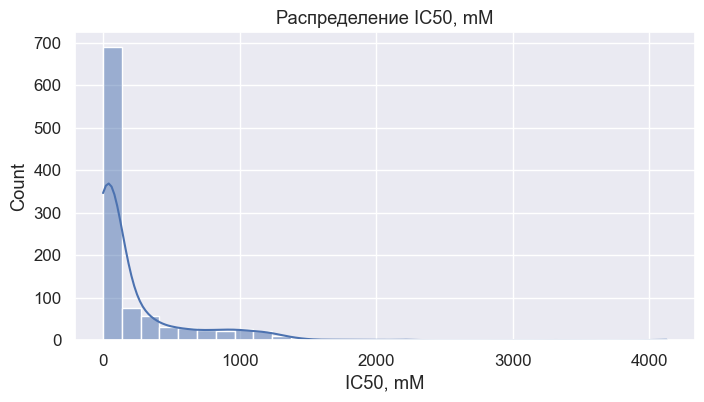

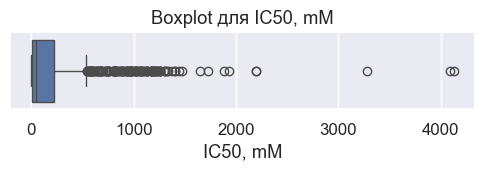

Выбросов по z-score > 3: 11 (1.10%)


count    1001.000000
mean      589.110728
std       642.867508
min         0.700808
25%        99.999036
50%       411.039342
75%       894.089176
max      4538.976189
Name: CC50, mM, dtype: float64

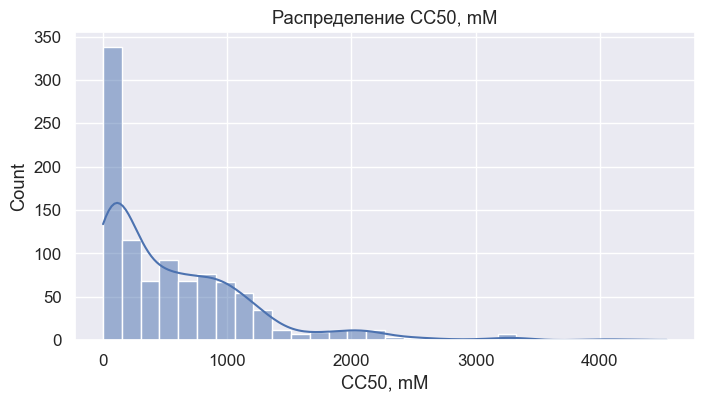

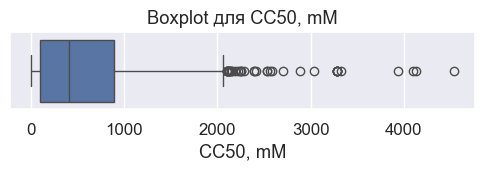

Выбросов по z-score > 3: 18 (1.80%)


count     1001.000000
mean        72.508823
std        684.482739
min          0.011489
25%          1.433333
50%          3.846154
75%         16.566667
max      15620.600000
Name: SI, dtype: float64

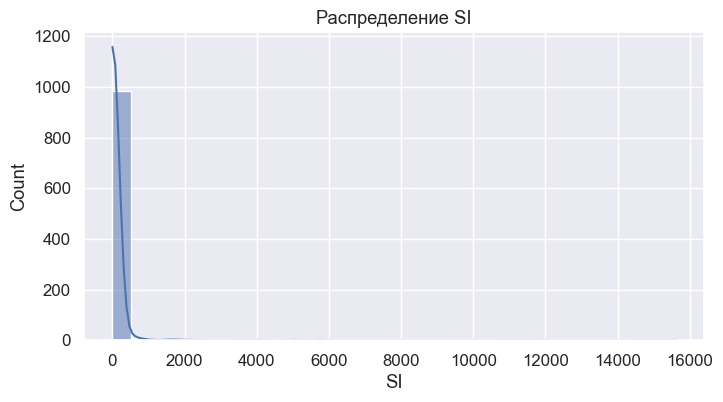

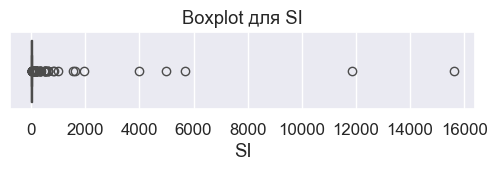

Выбросов по z-score > 3: 5 (0.50%)


In [4]:
target_cols = ['IC50, mM', 'CC50, mM', 'SI']

for col in target_cols:
    display(df[col].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.show()
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot для {col}')
    plt.show()
    outliers = np.sum(np.abs(zscore(df[col])) > 3)
    print(f"Выбросов по z-score > 3: {outliers} ({outliers/df.shape[0]:.2%})")


- **IC50, mM**
  - Среднее: 222.81, медиана: 46.59, максимум: 4128.5
  - Выраженная асимметрия: много низких значений, длинный правый хвост (типично для биологических данных).
  - Выбросы: 11 точек (1.10%) 
- **CC50, mM**
  - Среднее: 589.1, медиана: 411.0, максимум: 4538.97
  - Также правостороннее распределение, выбросов чуть больше.
  - Выбросы: 18 точек (1.80%)
- **SI**
  - Среднее: 72.5, медиана: 3.85, максимум: 15620.6
  - Очень большой разброс и длинный хвост (некоторые соединения — экстремально селективны).
  - Выбросы: 5 точек (0.50%)

В дальнейшем потребуется логарифмирование

**Анализ числовых признаков после удаления таргет-колонок**

In [5]:
features = [c for c in df.columns if c not in target_cols]
print("Число признаков:", len(features))
display(df[features].describe())

Число признаков: 210


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,...,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.0,1001.000000,1001.0,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.0,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.0,1001.000000,1001.000000,1001.000000,1001.0,1001.00000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,348.262234,324.469003,347.940606,132.115884,0.0,0.235794,-0.407395,0.415772,0.227603,1.143163,1.824615,2.418738,23.176743,9.792336,2.472305,-2.347098,2.473152,-2.403473,6.294317,-0.069618,2.816498,1.853512e+00,753.989755,17.667386,14.524225,14.854952,11.729250,8.639561,8.937560,7.316551,7.657106,5.621344,5.907535,4.164903,4.403452,-1.890493,4.831703e+10,17.019803,6.377423,3.087447,146.684560,12.629592,8.063287,4.993287,...,0.0,1.454545,0.0,0.0,0.004995,0.219780,1.012987,0.048951,0.003996,0.634366,0.002997,0.065934,0.051948,0.026973,0.0,0.0,0.191808,0.112887,0.0,0.044955,0.271728,0.082917,0.005994,0.026973,0.011988,0.010989,0.0,0.003996,0.008991,0.180819,0.177822,0.177822,0.0,0.0,0.064935,0.017982,0.023976,0.0,0.02997,0.054945,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,126.946370,121.694134,126.807891,46.701805,0.0,0.129237,0.075863,0.071845,0.119468,0.241080,0.320613,0.396290,14.511738,0.460611,0.161880,0.168621,0.156876,0.176770,1.089528,0.249237,0.432285,4.547033e-01,435.910644,6.309870,5.179048,5.268821,4.432143,3.136190,3.229219,2.744515,2.836887,2.464375,2.536668,1.938137,2.020601,1.382181,1.255969e+12,6.370725,3.004727,1.722344,52.539546,11.593324,12.609104,8.940833,...,0.0,1.431147,0.0,0.0,0.083517,0.477125,1.412385,0.233669,0.063119,1.256255,0.054690,0.252286,0.222033,0.162086,0.0,0.0,0.507122,0.415023,0.0,0.230167,0.729445,0.371642,0.077227,0.162086,0.108886,0.104303,0.0,0.063119,0.104494,0.481946,0.726875,0.726875,0.0,0.0,0.269776,0.218349,0.153051,0.0,0.17059

**Выводы по данным:**
  
Датасет включает множество разнообразных признаков, из которых часть можно удалить (константные и несбалансированные)

In [6]:
const_cols = [c for c in features if df[c].nunique() == 1]
print("Константные признаки:", const_cols)

imbalanced_cols = [c for c in features if df[c].value_counts(normalize=True).iloc[0] > 0.95]
print("Сильно несбалансированные признаки:", imbalanced_cols)

df_clean = df.drop(columns=list(set(const_cols + imbalanced_cols)))

Константные признаки: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Сильно несбалансированные признаки: ['NumRadicalElectrons', 'SMR_VSA2', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_NH', 'fr_C_S', 'fr_HOCCN', 'fr_N_O', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_amidine', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_furan', 'fr_guanido', 'fr_hdrzine', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_lactone', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulf

Датасет очищен от признаков, которые увеличивают размерность задачи и могут приводить к переобучению.

**Выведем топ-10 признаков по абсолютной корреляции с целевыми переменными**

In [7]:
for t in target_cols:
    corr = df_clean.drop(columns=target_cols).corrwith(df_clean[t]).abs().sort_values(ascending=False)
    print(f"\nTop-10 по корреляции с {t} (сырые):")
    print(corr.head(10))


Top-10 по корреляции с IC50, mM (сырые):
VSA_EState4    0.274203
Chi2n          0.257058
PEOE_VSA7      0.255988
Chi2v          0.249164
Chi4v          0.243600
Chi4n          0.243497
Chi3n          0.239741
Chi3v          0.237759
SlogP_VSA5     0.236393
Chi1n          0.229828
dtype: float64

Top-10 по корреляции с CC50, mM (сырые):
MolMR             0.310111
LabuteASA         0.309191
MolWt             0.306439
ExactMolWt        0.306382
HeavyAtomCount    0.305169
Chi0              0.304792
Chi1              0.304380
HeavyAtomMolWt    0.303163
Kappa1            0.302206
Chi1v             0.301525
dtype: float64

Top-10 по корреляции с SI (сырые):
BalabanJ            0.162955
fr_NH2              0.160470
RingCount           0.124444
fr_Al_COO           0.102414
fr_COO              0.101115
fr_COO2             0.101115
NumAromaticRings    0.088064
VSA_EState4         0.087837
FpDensityMorgan1    0.087341
VSA_EState6         0.082995
dtype: float64


**Выводы:**
- Максимальные корреляции относительно низкие (до 0.31), что говорит о слабой линейной зависимости между отдельными признаками и целями.

- Есть дескрипторы, связанные с размером и структурой молекулы (молекулярный вес, число тяжёлых атомов), а также различные топологические индексы (Chi, Kappa и др).

- Низкие значения корреляции означают, что модель не сможет строить хорошие прогнозы только на одной сильной фиче, придётся использовать сразу много признаков и сложные комбинации.

**Проведем логарифмическое преобразование целевых переменных**

In [8]:
for col in target_cols:
    df_clean[f'log_{col.split(",")[0]}'] = np.log1p(df_clean[col])

C:\Users\Eli\AppData\Local\Temp\ipykernel_13228\3806908639.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[f'log_{col.split(",")[0]}'] = np.log1p(df_clean[col])
C:\Users\Eli\AppData\Local\Temp\ipykernel_13228\3806908639.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean[f'log_{col.split(",")[0]}'] = np.log1p(df_clean[col])
C:\Users\Eli\AppData\Local\Temp\ipykernel_13228\3806908639.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

Это преобразование поможет улучшить качество моделей в задачах регрессии, т.к. исходные переменные имеют тяжелые хвосты и большие разбросы.

count    1001.000000
mean        3.982219
std         1.861484
min         0.003511
25%         2.603829
50%         3.862521
75%         5.420428
max         8.325919
Name: log_IC50, dtype: float64

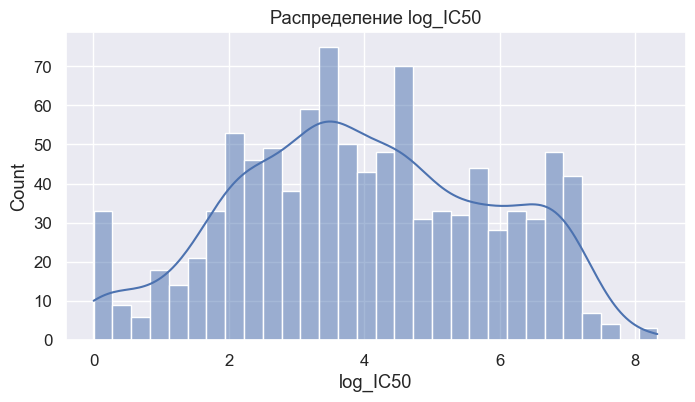

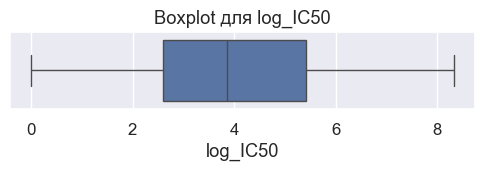

Выбросов по z-score > 3: 0 (0.00%)


count    1001.000000
mean        5.567016
std         1.587393
min         0.531103
25%         4.615111
50%         6.021119
75%         6.796923
max         8.420677
Name: log_CC50, dtype: float64

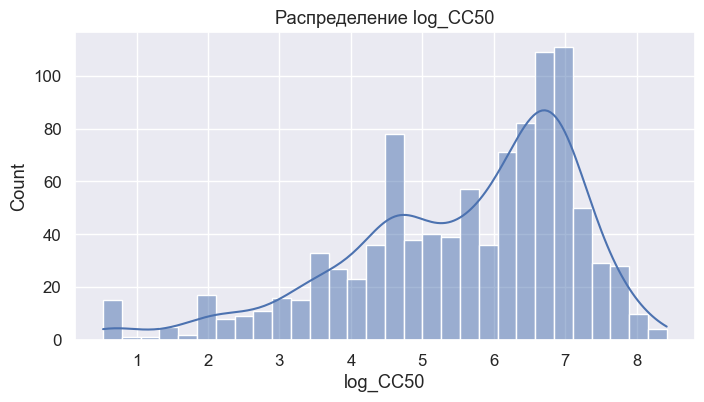

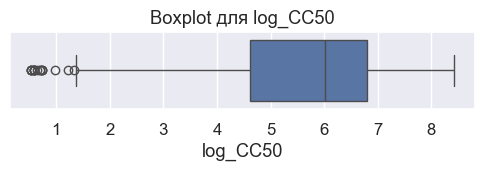

Выбросов по z-score > 3: 15 (1.50%)


count    1001.000000
mean        2.042131
std         1.456218
min         0.011424
25%         0.889262
50%         1.578185
75%         2.866003
max         9.656410
Name: log_SI, dtype: float64

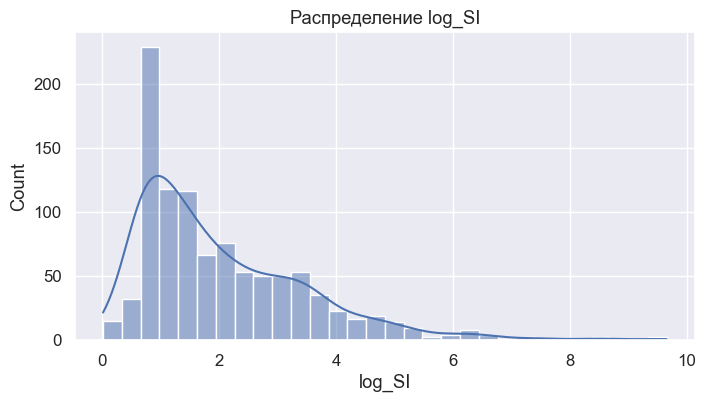

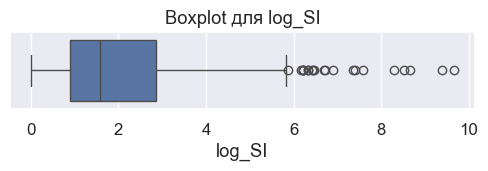

Выбросов по z-score > 3: 14 (1.40%)


In [9]:
for col in ['log_IC50', 'log_CC50', 'log_SI']:
    display(df_clean[col].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.show()
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot для {col}')
    plt.show()
    outliers = np.sum(np.abs(zscore(df_clean[col])) > 3)
    print(f"Выбросов по z-score > 3: {outliers} ({outliers/df_clean.shape[0]:.2%})")


**Выводы**
- Распределения переменных стали намного более симметричными, хвосты распределения укоротились.
- Гистограммы теперь близки к нормальным, с менее выраженной асимметрией по сравнению с исходными значениями.
- Boxplot показывают уменьшение количества экстримальных выбросов.
- Число выбросов по z-score уменьшилось (кроме SI - на нем увеличлось).

Таким образом, можно сказать, что после логарифмирования данные стали ближе к предпосылкам линейных моделей, что положительно скажется на стабильности и качестве обучения, сниженное число выбросов минимизирует риск того, что отдельные точки будут чрезмерно влиять на модель (overfitting).

In [10]:
features_clean = [c for c in df_clean.columns if c not in target_cols + ['log_IC50', 'log_CC50', 'log_SI']]
for t in ['log_IC50', 'log_CC50', 'log_SI']:
    corr = df_clean[features_clean].corrwith(df_clean[t]).abs().sort_values(ascending=False)
    print(f"\nTop-10 по корреляции с {t} (логарифм):")
    print(corr.head(10))


Top-10 по корреляции с log_IC50 (логарифм):
NumSaturatedHeterocycles    0.272508
VSA_EState4                 0.258912
fr_NH2                      0.257880
SlogP_VSA5                  0.238441
NumAliphaticHeterocycles    0.225604
NumAliphaticCarbocycles     0.213213
SMR_VSA5                    0.205296
PEOE_VSA7                   0.201324
VSA_EState8                 0.192768
VSA_EState7                 0.183794
dtype: float64

Top-10 по корреляции с log_CC50 (логарифм):
Kappa3             0.251795
fr_allylic_oxid    0.229358
fr_NH2             0.226112
PEOE_VSA7          0.216066
Kappa2             0.207330
EState_VSA2        0.205663
fr_C_O_noCOO       0.198593
Kappa1             0.197303
VSA_EState4        0.196051
fr_C_O             0.194536
dtype: float64

Top-10 по корреляции с log_SI (логарифм):
FractionCSP3                0.222259
SMR_VSA7                    0.219979
SlogP_VSA6                  0.205386
NumAliphaticHeterocycles    0.203656
NumSaturatedHeterocycles    0.197146
Ri

**Выводы:**

- Сильных корреляций не наблюдается
- Часть переменных (например, VSA_EState4, PEOE_VSA7, fr_NH2) входят в топ по корреляции сразу для двух таргетов.
- Фрагменты структуры молекулы (фрагментные дескрипторы, topological descriptors и др.) действительно оказывают влияние, что соответствует химической природе поставленной задачи.

**Краткий анализ тепловой карты и подсчет сильно скоррелированных пар**

Пар признаков с корреляцией > 0.95: 89


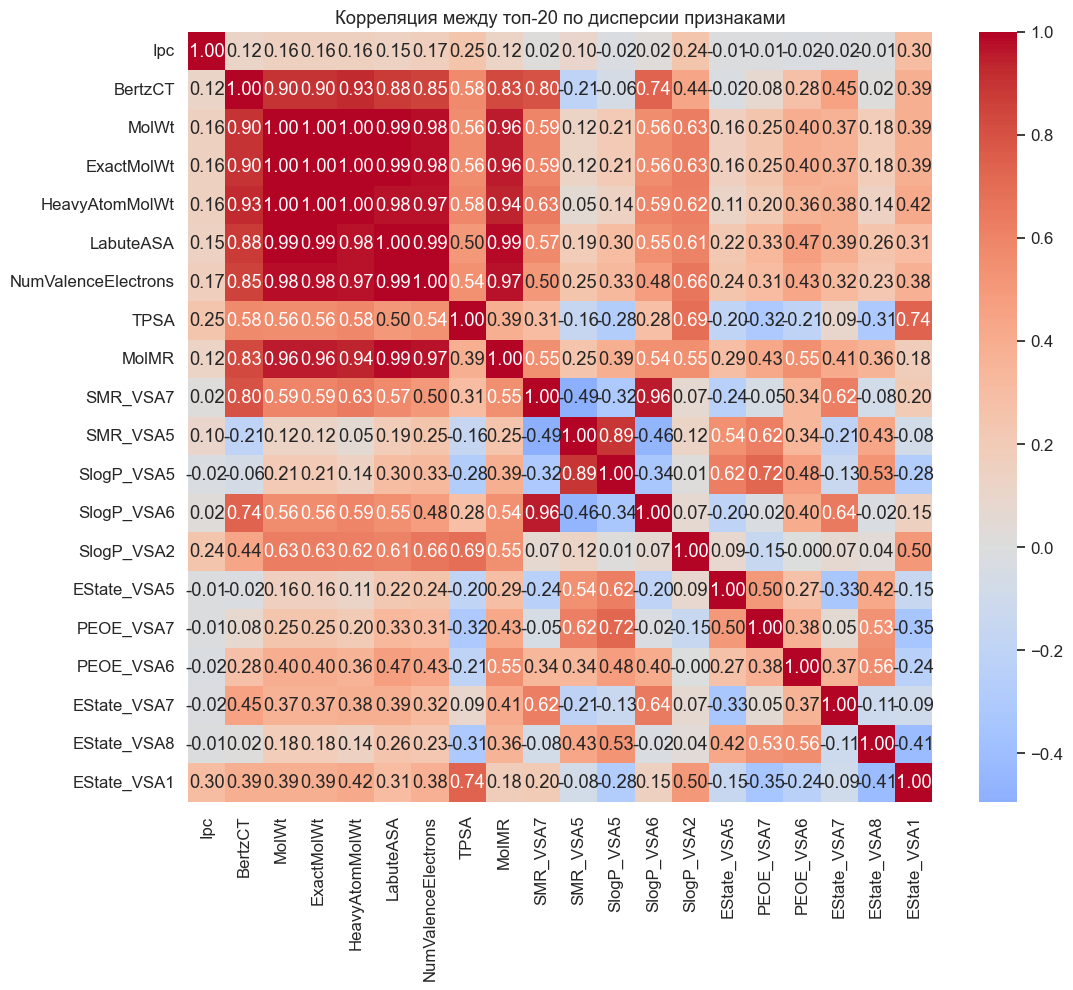

In [11]:
corr_matrix = df_clean[features_clean].corr().abs()
high_corr = [(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
             for i in range(len(corr_matrix.columns))
             for j in range(i) if corr_matrix.iloc[i, j] > 0.95]
print(f"Пар признаков с корреляцией > 0.95: {len(high_corr)}")

top_var_cols = df_clean[features_clean].var().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[top_var_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляция между топ-20 по дисперсии признаками')
plt.show()

В работе было принято решение не удалять мультиколлинеарные признаки и не подвергать уменьшению размерности, так как:

- Основные модели (Random Forest, Lasso, Ridge), которые планируется использовать, устойчивы к мультиколлинеарности.

- Сохранение исходных дескрипторов важно для интерпретации химических и биологических закономерностей.

- Проведение PCA может затруднить анализ значимых признаков и их физический смысл.

**Сохраним для построения моделей очищенный датасет с прологорифмированными таргетами.**

In [12]:
df_clean.to_excel('data/course_data_clean_log.xlsx', index=False)

**Итоги исследовательского анализа данных (EDA)**

*Краткая характеристика датасета*

- **1001 соединение** с **210 химическими признаками**.
- **3 целевых переменных:**
    - `IC50, mM` — активность
    - `CC50, mM` — токсичность
    - `SI` — селективность

*Основные проблемы и способы их решения*

- **Асимметрия распределения таргетов:**  
  Все целевые переменные имеют длинный правый хвост — требуется логарифмирование.
- **Выбросы:**  
  До логарифмирования — много выбросов (>10%). После — ситуация заметно улучшается.
- **Константные признаки:**  
  18 признаков константны — удалены.
- **Сильно несбалансированные признаки:**  
  Признаки, в которых более 95% значений совпадают, удалены для уменьшения избыточности.
- **Мультиколлинеарность:**  
  Найдено **89 пар признаков с корреляцией > 0.95**.

*Взаимосвязи между признаками и таргетами*

- Для каждой целевой переменной рассчитан топ-10 корреляций с признаками.
- После логарифмирования состав топовых признаков почти не изменился, абсолютные значения корреляций уменьшились.

*Предобработка*

- Все целевые переменные переведены в логарифмическую шкалу.
- Константные и сильно несбалансированные признаки удалены.
- Пропуски заполнены медианой.
- Мультиколлинеарность сохраняется, но PCA/отбор признаков не применялись — чтобы сохранить интерпретируемость.

*Моделирование*

- Для линейных моделей — использовать скейлинг и регуляризацию.
- Для сложных моделей (Random Forest/XGBoost) — тщательный подбор гиперпараметров.
- Применять PCA только если будет явное переобучение.

*Химический смысл*

- **IC50** — определяется электронными и топологическими дескрипторами.
- **CC50** — определяется размером молекулы, атомным составом.
- **SI** — комбинация активности и токсичности, важны уникальные структурные фрагменты.

*Краткие выводы*

- Датасет содержит избыточность и мультиколлинеарность, но логарифмирование и базовая фильтрация решают большинство проблем.
- Для SI качество моделей априори будет ниже, чем для IC50 и CC50.